[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/niteshjindal170988/divvy-bikes-analysis/blob/main/divvy_bikes_customer_base_analysis.ipynb)


# Customer base analysis on the **divvy bicycles** data set:

Dataset:
<br>
__[My Google Drive](https://drive.google.com/uc?id=1SJeijqqwvz9OfddACxQbspptaGr51qBf)__

# Import Modules:

In [1]:
from IPython.display import display_html
def restartkernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import warnings 
import time
from subprocess import run
matplotlib.style.use('ggplot')

dirlist=list(dir())

if 'sc' in dirlist:

    try:
        del dirlist[dirlist.index('sc')]
    
    except:
        print("sc not present")


if 'SparkContext' in dirlist: 

    try:
        del dirlist[dirlist.index('SparkContext')]

    except:
        print("sparkcontext not present")

if 'SQLContext' in dirlist:
    
    try:
        del dirlist[dirlist.index('SQLContext')]

    except:
        print("sqlcontext not present")


sc= SparkContext(appName="my_app3", master= "local[1]") 
sqlContext = SQLContext(sc) 

22/07/28 14:27:56 WARN Utils: Your hostname, nitesh-Predator-PH315-54 resolves to a loopback address: 127.0.1.1; using 192.168.1.7 instead (on interface wlp0s20f3)
22/07/28 14:27:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/07/28 14:27:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


/home/nitesh/env/dev37/python37/lib/python3.7/site-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


# Download chicago divvy bicycle sharing data from google drive path:

In [5]:
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org google-api-python-client==2.22.0
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org google-auth google-auth-oauthlib google-auth-httplib2%

try:
    %pip install --upgrade --no-cache-dir gdown
    %pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org gdown==4.4.0
    import gdown
    warnings.filterwarnings("ignore")
    url = 'https://drive.google.com/uc?id=1SJeijqqwvz9OfddACxQbspptaGr51qBf'  #path to data.csv and save output as chicago-divvy-bicycle-sharing-data.csv

    output = 'chicago-divvy-bicycle-sharing-data.csv'
    gdown.download(url, output, quiet=False, verify=False)

except:
    cmd= "curl -L -s -o chicago-divvy-bicycle-sharing-data.csv 'https://drive.google.com/uc?id=1SJeijqqwvz9OfddACxQbspptaGr51qBf&confirm=t'"  #path to data.csv and save output as chicago-divvy-bicycle-sharing-data.csv
    run(cmd, shell=True )

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14933 sha256=96661db4b1c3509668c926c6cb34f5cfe2929796765440d07b2521e4b7ce852b
  Stored in directory: /tmp/pip-ephem-wheel-cache-7cmfhbdb/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
You should consider upgrading via the '/home/nitesh/env/dev37/python37/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
  Using cached gdown-4.4.0-py3-none-any.whl
  Attempting uninstall: gdown
    Found existing installation: gdown 4.5.1
    Uninstalling gdown-4.5.1:
      Successfully uninstalled gdown-4.5.1
You should consider upgrading via th

Downloading...
From: https://drive.google.com/uc?id=1SJeijqqwvz9OfddACxQbspptaGr51qBf
To: /home/nitesh/env/dev37/repos/divvy-bikes-analysis/chicago-divvy-bicycle-sharing-data.csv
100%|██████████| 2.08G/2.08G [02:45<00:00, 12.6MB/s]


# Load the file in SQL Context:

In [2]:
df = sqlContext.read.load("chicago-divvy-bicycle-sharing-data.csv",format='com.databricks.spark.csv',header='true',inferSchema='true')
# Creating view 
df.createOrReplaceTempView("divvy")

# Distribution of trips on basis on user category-Subscriber, Customer and Dependent:


Overall distribution of trips by different user categories-



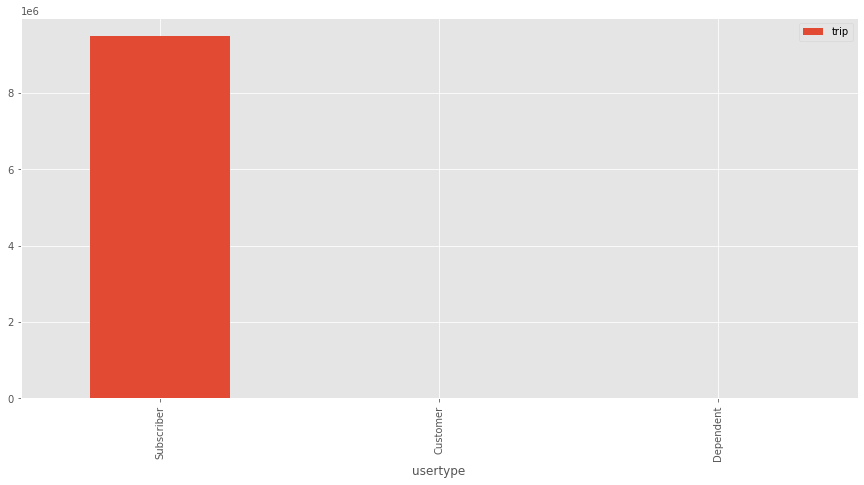


Year-wise trips made by Subscribers-



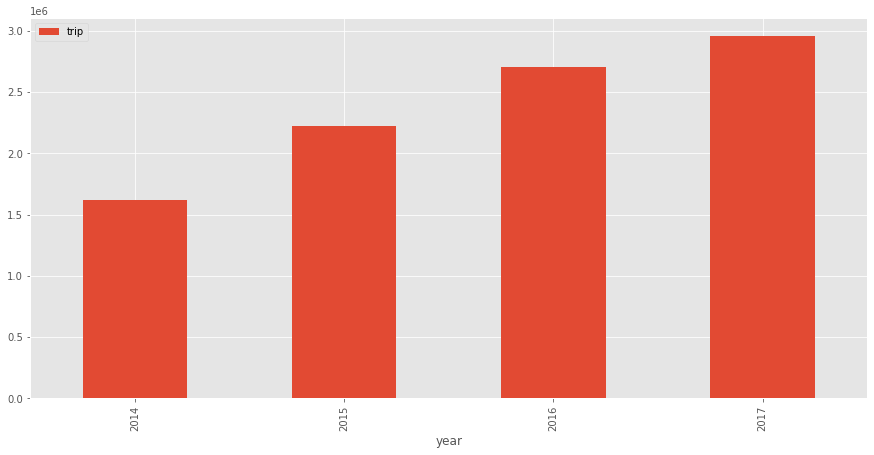


Year-wise trips made by Customers-



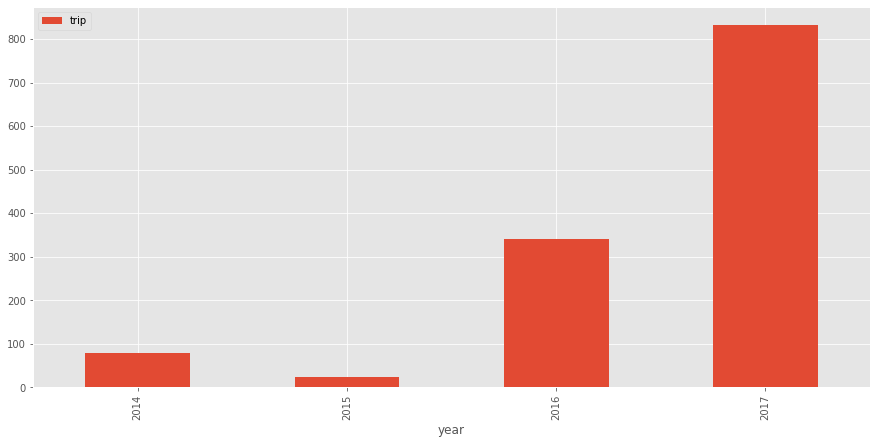

In [3]:
print("\nOverall distribution of trips by different user categories-\n")
users=sqlContext.sql("select usertype,count(trip_id) as trip from divvy GROUP BY usertype")
users_df = users.toPandas()
users_df.plot(kind="bar", x="usertype", y="trip", figsize=(15,7))
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


print("\nYear-wise trips made by Subscribers-\n")
users_year=sqlContext.sql("select year,usertype,count(trip_id) as trip from divvy GROUP BY year,usertype ")
users_year_df = users_year.toPandas()
users_year_df1 = users_year_df[users_year_df['usertype']=='Subscriber'].sort_values('year')
users_year_df1.plot(kind="bar", x="year", y="trip", figsize=(15,7))
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


print("\nYear-wise trips made by Customers-\n")
users_year_df2 = users_year_df[users_year_df['usertype']=='Customer'].sort_values('year')
users_year_df2.plot(kind="bar", x="year", y="trip", figsize=(15,7))
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


It is conspicuous from the above depictions that customers share a very little proportion in terms of trip counts, whereas subscribers has the total trip counts more than 8mn.
Trip counts amongs subscribers have consistently been increasing from year 2014 (which had 1.6 mn trips) till 2017 (which had roughly 3 mn trips among subscribers). <br>

Customer Bike riding pattern based on Gender, for example - 
<br>
whether Men prefer renting Bicycle more compared with Women, overall?, or are there specific routes where we can see the bias?
<br>
Let us explore these through below visualization

# Gender based renting counts:


Renting Patterns across Gender(Male/Female): 



<AxesSubplot:xlabel='gender'>

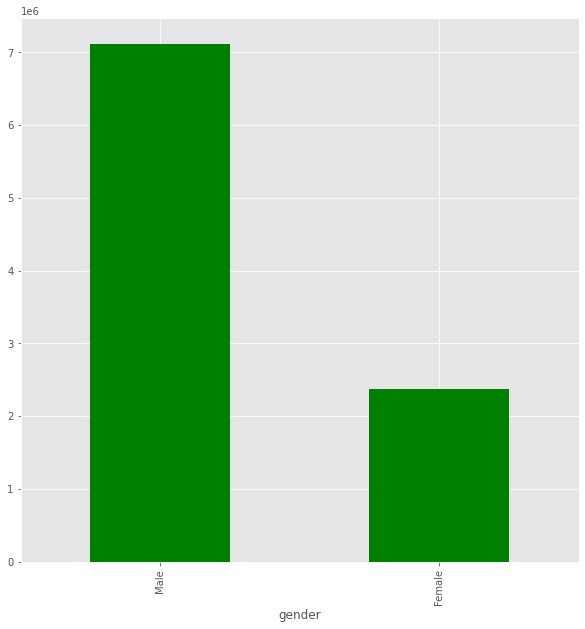

In [4]:
print("\nRenting Patterns across Gender(Male/Female): \n")

gender_renting_cnts = sqlContext.sql("SELECT gender, COUNT(*) as renting_counts FROM divvy GROUP BY gender ORDER BY renting_counts DESC")

renting_counts = [item[1] for item in gender_renting_cnts.collect()]
gender = [item[0] for item in gender_renting_cnts.collect()]

rentingpattern_gender = {"gender":gender, "renting_count" : renting_counts}

rentingpattern_across_gender = pd.DataFrame(rentingpattern_gender)
rentingpattern_across_gender.plot(figsize = (10,10), kind = "bar", color = "green", x = "gender", y = "renting_count", legend = False)

# Year-wise Distribution of Gender based Renting Counts:


Visualization of Year-wise distribution of Gender based Renting Counts: 



+------+----+--------------+
|gender|year|renting_counts|
+------+----+--------------+
|Female|2014|        396568|
|  Male|2014|       1219115|
|Female|2015|        560409|
|  Male|2015|       1660100|
|Female|2016|        682389|
|  Male|2016|       2018964|
|Female|2017|        739309|
|  Male|2017|       2218381|
+------+----+--------------+




Gender based yearly renting trend-



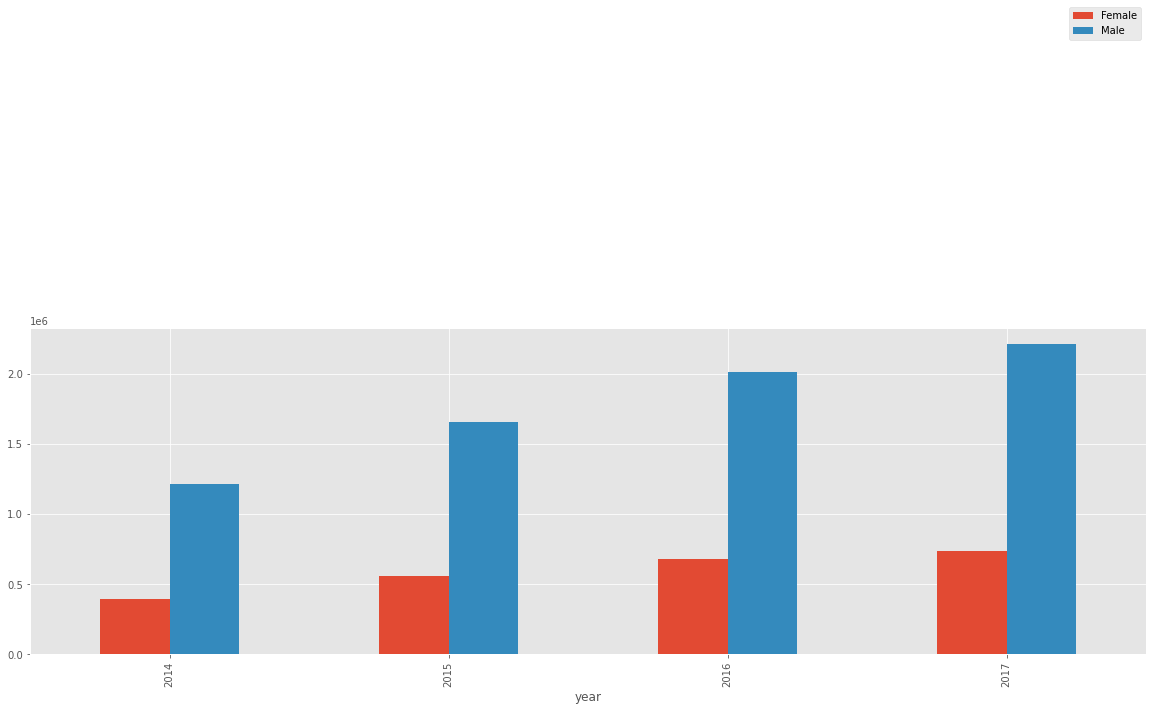

In [5]:
print("\nVisualization of Year-wise distribution of Gender based Renting Counts: \n")
yrwise_gender_dist_rentings = sqlContext.sql("SELECT gender, year, COUNT(*) as renting_counts FROM divvy GROUP BY gender, year ORDER BY year, renting_counts")

yrwise_gender_dist_rentings.show(10)

#convert spark dataframe to pandas dataframe -
year= [item[1] for item in yrwise_gender_dist_rentings.collect()]
gender = [item[0] for item in yrwise_gender_dist_rentings.collect()]
renting_counts = [item[2] for item in yrwise_gender_dist_rentings.collect()]

print("\nGender based yearly renting trend-\n")
genderbased_renting_yearlytrend = {"year":year, "gender" : gender, "renting_count" : renting_counts}
gbrt = pd.DataFrame(genderbased_renting_yearlytrend)
# use pivot function to get yearwise distribution of renting counts based on gender-
gbrt1=gbrt.groupby('year').head(10)
gbrt1.pivot("year", "gender", "renting_count").plot(kind='bar', figsize=(20,6))
plt.legend(bbox_to_anchor=(1, 2))
plt.show()

We can see in above figure the renting counts was highest for males as compared with women

# Most Dominant Routes among gender:- Gender-wise most preferred routes:

(Might include common routes opted by both gender)



Gender based preferred/dominant routes trip counts- 



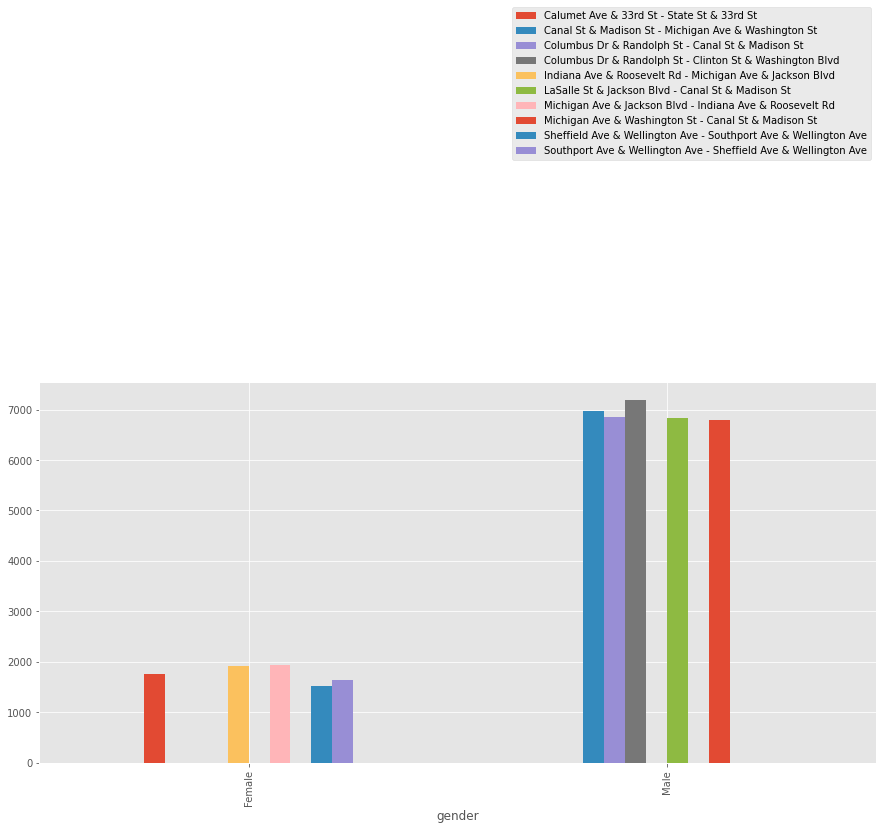


top 5 routes preferred by gender: male: 

top 5 routes preferred by gender: female: 

Routes preferred by males only: 




Routes preferred by females only: 



<AxesSubplot:xlabel='preferredroute'>

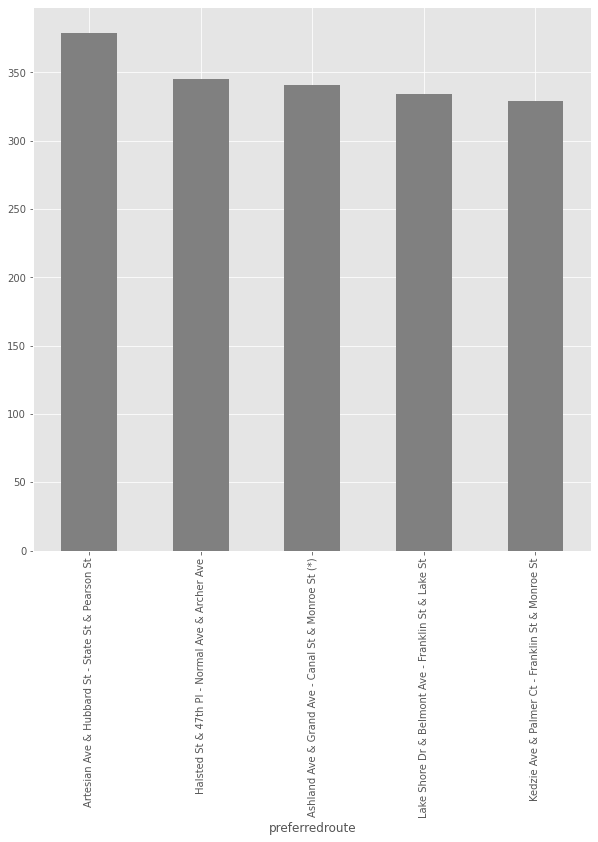

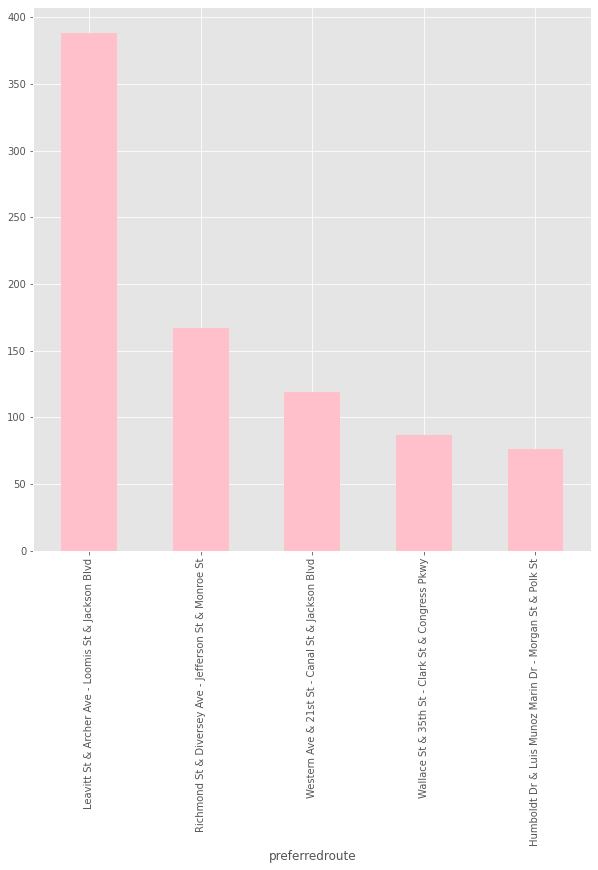

In [6]:
print("\n\nGender based preferred/dominant routes trip counts- \n")

sol_10_1 = sqlContext.sql("SELECT gender, CONCAT(from_station_name, ' - ',to_station_name) as preferredroute, COUNT(*) as counts FROM divvy GROUP BY gender, preferredroute ORDER BY gender, counts DESC")
#Convert spark dataframe to pandas dataframe 
preferredroute = [item[1] for item in sol_10_1.collect()]
gender = [item[0] for item in sol_10_1.collect()]
counts = [item[2] for item in sol_10_1.collect()]

gender_preferred_stn = {"gender":gender, "preferredroute" : preferredroute, "tripcounts" : counts}
gps = pd.DataFrame(gender_preferred_stn)
gps1=gps.groupby('gender').head(5)

# Visualization of  Dominant Routes among gender-
# Gender based most preferred routes (Might include common routes opted by both gender)

gps1.pivot("gender", "preferredroute", "tripcounts").plot(kind='bar', figsize=(15,7))
plt.legend(bbox_to_anchor=(1, 2))
plt.show()


#filter out preferred routes for gender - male
print("\ntop 5 routes preferred by gender: male: ")
sol_10_1_m = sol_10_1.filter((sol_10_1.gender == "Male")).sort('counts', ascending=False)
sol_10_1_mm = sol_10_1_m.select(sol_10_1_m.preferredroute)
#sol_10_1_mm.show(5)


#filter out preferred routes for gender - female
print("\ntop 5 routes preferred by gender: female: ")
sol_10_1_f = sol_10_1.filter((sol_10_1.gender == "Female")).sort('counts', ascending = False)
sol_10_1_ff  = sol_10_1_f.select(sol_10_1_f.preferredroute)
#sol_10_1_ff.show(5)

 # Only male dominant routes (Exclude common routes)
    # Only female dominant routes (Exclude common routes)

#use subtract function to get routes which are preferred by males. and not by females.
sol_10_maleoverfemale_bias = sol_10_1_mm.subtract(sol_10_1_ff)
#sol_10_maleoverfemale_bias.show(5)

print("\nRoutes preferred by males only: \n")
# join tables to get the trip counts for the routes preferred by male only- 
mdr = sol_10_1_m.join(sol_10_maleoverfemale_bias, sol_10_maleoverfemale_bias.preferredroute == sol_10_1_m.preferredroute, "inner") 
#convert spark dataframe to pandas dataframe
preferredroute_mdr = [item[1] for item in mdr.collect()]
counts_mdr = [item[2] for item in mdr.collect()]

mdr1 = {"preferredroute":preferredroute_mdr,"tripcounts" : counts_mdr}
mdr2 = pd.DataFrame(mdr1)
mdr3 = mdr2.sort_values('tripcounts', ascending=False).head(5)
mdr3.plot(figsize = (10,10), kind = "bar", color = "grey", x = "preferredroute", y = "tripcounts", legend = False)


print("\nRoutes preferred by females only: \n")
sol_10_femaleovermale_bias = sol_10_1_ff.subtract(sol_10_1_mm)
#df.filter(df.age == 30).show()
fdr = sol_10_1_f.join(sol_10_femaleovermale_bias, sol_10_femaleovermale_bias.preferredroute == sol_10_1_f.preferredroute, "inner")
#test = sol_10_1_m.filter(sol_10_1_m.preferredroute == sol_10_maleoverfemale_bias.show(5))
preferredroute_fdr = [item[1] for item in fdr.collect()]
counts_fdr = [item[2] for item in fdr.collect()]

fdr1 = {"preferredroute":preferredroute_fdr,"tripcounts" : counts_fdr}
fdr2 = pd.DataFrame(fdr1)
fdr3 = fdr2.sort_values('tripcounts', ascending=False).head(5)
fdr3.plot(figsize = (10,10), kind = "bar", color = "pink", x = "preferredroute", y = "tripcounts", legend = False)

In [7]:
%rm chicago-divvy-bicycle-sharing-data.csv